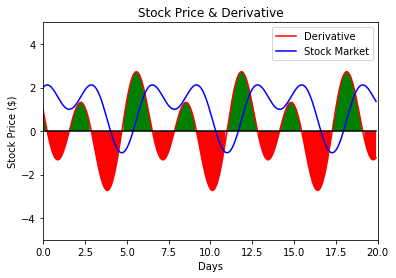

Buy at the following times: [1.57, 4.71, 7.85, 11.0, 14.14, 17.28]
Sell at the following times: [2.89, 6.54, 9.17, 12.82, 15.46, 19.1]


In [6]:
import sympy as sym
import numpy as np
x_sym=symbols('x')
init_printing(use_unicode=True)
y_sym_stock = sym.sin(x_sym)+2*sym.cos(x_sym)**2
y_sym_deriv = diff(y_sym_stock,x_sym,1)
#the derivatives has been found as an equation of symbols and needs to be converted to functions
y_deriv = lambdify(x_sym, y_sym_deriv) 
y_stock = lambdify(x_sym,y_sym_stock)

import matplotlib.pyplot
from matplotlib.pyplot import *
figure()
xmax = 20
x1=np.arange(0,xmax,0.1)
zero=0*x1
stock=y_stock(x1)
deriv=y_deriv(x1)
xlim(0,xmax)
ylim(-5,5)
xlabel('Days')
ylabel('Stock Price ($)')
plot(x1,deriv, c='r', label='Derivative')
plot(x1,stock, c='b', label='Stock Market')
plot(x1,zero, c='black')
fill_between(x1,deriv,0,where=deriv>0, facecolor='green')
fill_between(x1,deriv,0,where=deriv<0, facecolor='red')
legend(['Derivative','Stock Market'],loc='best')
title ('Stock Price & Derivative') 
show()

from scipy.optimize import fsolve
y_sym_2deriv = diff(y_sym_stock,x_sym,2)
y_2deriv = lambdify(x_sym, y_sym_2deriv) 
buys = set()
sells = set()
x2=np.arange(0,xmax,1)
for x in x2:
   guess = x2[x]
   soln = fsolve(y_deriv, guess)
   if y_2deriv(soln) > 0 and soln >= 0 and np.round(y_deriv(soln)) == 0 and soln <= xmax:
       buys.add(round(soln[0],2))
for x in x2:
   guess = x2[x]
   soln = fsolve(y_deriv, guess)
   if y_2deriv(soln) < 0 and soln > min(buys) and np.round(y_deriv(soln)) == 0 and soln <= xmax:
       sells.add(round(soln[0],2))
        
print('Buy at the following times:',sorted(buys))
print('Sell at the following times:',sorted(sells))